INDIAN REGIONAL SCENIC TEXT RECOGNITION

This approach shows how to detect regions in an image that contain text by using maximally stable extremal regions (MSER) feature detector. This is a common task performed on unstructured scenes. Unstructured scenes are images that contain undetermined or random scenarios. This is different than structured scenes, which contain known scenarios where the position of text is known beforehand.

1. numpy is a Python library used for scientific computing.
2. cv2 is the OpenCV (Open Source Computer Vision Library) library for image processing.
3. PIL (Python Imaging Library) is a library for opening, manipulating, and saving many different image file formats.
4. matplotlib is a plotting library for the Python programming language.
5. easyocr is a Python package for optical character recognition (OCR).
6. pandas is a library used for data manipulation and analysis.

In [7]:
import cv2
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import easyocr
import pandas as pd
import numpy as np

Reading image and Preprocessing the image for detail output.
1. cv2.imread() reads the image as a matrix of pixel values.
2. cv2.cvtColor() is used to convert the color space of the image from BGR to grayscale.
3. cv2.medianBlur() is a filter applied to remove noise from the image.

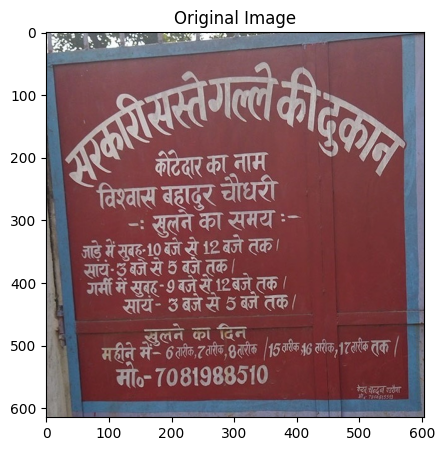

In [8]:
imgname = "./examples/test7.jpg"
img = cv2.imread(imgname)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)

What is MSER?

MSER stands for "Maximally Stable Extremal Regions" and refers to a computer vision algorithm used to detect regions or areas in an image that have consistent brightness or color.

To put it simply, MSER identifies and outlines regions of an image that have similar visual characteristics and are stable under different lighting conditions or image transformations. These regions can be used for various applications such as object recognition, tracking, and image segmentation.

The algorithm works by identifying pixels in an image that form connected components, and then analyzing the evolution of these components under different thresholds. Regions that remain stable across a range of thresholds are considered to be MSERs.

Overall, MSER is a powerful tool for computer vision tasks that require reliable and robust region detection in images.

MSER is present in Opencv library.

1. cv2.MSER_create() is a function to create a maximally stable extremal region (MSER) object.
2. mser.setMinArea() and mser.setMaxArea() are used to set the minimum and maximum areas of the detected regions.
3. mser.setDelta() sets the increment of the threshold levels used in the detection of MSERs.
4. mser.detectRegions() detects MSERs in the grayscale image and returns the coordinates of the regions and the bounding  boxes.

In [9]:
mser = cv2.MSER_create()
# having too less background details set from 100 to 200
mser.setMinArea(200)
# having too many background details set from 800 to 8000
mser.setMaxArea(8000)
mser.setDelta(4)
coordinates, bboxes = mser.detectRegions(gray)

Here, the detected regions are filtered based on their aspect ratio and size using a for loop. If the aspect ratio is greater than 5 or less than 0.2, or if the width or height of the bounding box is less than 10 pixels, the region is discarded. The remaining regions are stored in the coords list.

After filtering we are filling the detected objects with random colour for better clarity and highlighting the objects for text detection.

In [10]:
vis = img.copy()
coords = []
for coord in coordinates:
    bbox = cv2.boundingRect(coord)
    x, y, w, h = bbox
    aspect_ratio = float(w) / h
    if w < 10 or h < 10 or aspect_ratio > 5 or aspect_ratio < 0.2:
        continue
    coords.append(coord)

colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200], [43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132], [43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43], [116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43], [200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43], [200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158], [200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200], [80, 43, 200], [43, 43, 200]]
np.random.seed(0)
final_img = np.ones_like(img) *255
for cnt in coords:
    xx = cnt[:, 0]
    yy = cnt[:, 1]
    color = colors[np.random.choice(len(colors))]
    #color=[0,0,0]
    final_img[yy, xx] = color

After filtering we are sharpening the images for better clarity for text extraction.

Text(0.5, 1.0, 'Image after Recognition')

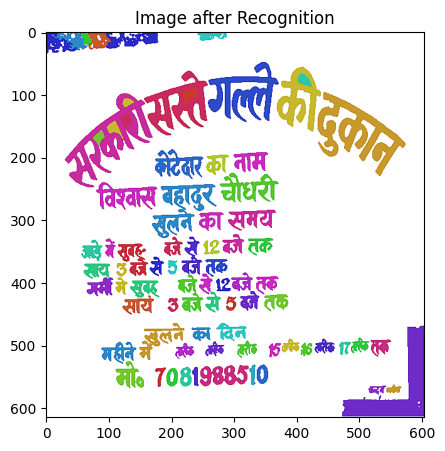

In [11]:
image_data = np.array(final_img)
image = Image.fromarray(image_data)
sharp_image = image.filter(ImageFilter.SHARPEN)
sharp_image_data = np.array(sharp_image)
final_img=sharp_image_data
plt.figure(figsize=(5,5))
plt.imshow(final_img)
plt.title("Image after Recognition")

Using EasyOCR for text Extraction from the filtered images.

In [12]:
reader = easyocr.Reader(['hi','en'], gpu=True)
result = reader.readtext(final_img)
pd.DataFrame(result, columns=['BBox', 'Text', 'Confidence'])

,BBox,Text,Confidence
0,"[[166, 186], [360, 186], [360, 240], [166, 240]]",केटेवार का नाम,0.480032
1,"[[72, 220], [382, 220], [382, 292], [72, 292]]",विश्वास वहाढुर चौधरी,0.673881
2,"[[162, 278], [372, 278], [372, 335], [162, 335]]",सुलने का समय,0.742115
3,"[[183, 319], [367, 319], [367, 363], [183, 363]]",र्जे रे ४२ क्जे तक,0.186945
4,"[[46, 311], [301, 311], [301, 407], [46, 407]]",ख्ेरफ रे छेरे@,0.016784
5,"[[65, 391], [187, 391], [187, 430], [65, 430]]",मर्म मे सुढ़्,0.393339
6,"[[203, 374], [378, 374], [378, 425], [203, 425]]",प्जेॅसे २वजे तठ,0.101658
7,"[[118, 411], [394, 411], [394, 459], [118, 459]]",सायं 3 क्जे से 5व्जे तक,0.175331
8,"[[85, 495], [149, 495], [149, 531], [85, 531]]",मह्लैने,0.241265
9,"[[204, 494], [240, 494], [240, 524], [204, 524]]",फ,0.658970
